<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/Data_Analyst_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/DataAnalyst.csv')

In [ ]:

# Display the first few rows to understand the structure
print(df.head())

   Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

       

In [ ]:
# Basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [ ]:
# Summary statistics
print(df.describe(include='all'))

        Unnamed: 0     Job Title             Salary Estimate  \
count    2253.0000          2253                        2253   
unique         NaN          1272                          90   
top            NaN  Data Analyst  $41K-$78K (Glassdoor est.)   
freq           NaN           405                          57   
mean     1126.0000           NaN                         NaN   
std       650.5294           NaN                         NaN   
min         0.0000           NaN                         NaN   
25%       563.0000           NaN                         NaN   
50%      1126.0000           NaN                         NaN   
75%      1689.0000           NaN                         NaN   
max      2252.0000           NaN                         NaN   

                                          Job Description       Rating  \
count                                                2253  2253.000000   
unique                                               2253          NaN   
top     Y

In [ ]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [ ]:
# cleaning the 'Salary Estimate' column by extracting the numeric values and converting them into a usable format for analysis.
import re


In [ ]:
# Function to clean salary estimate
def clean_salary(salary_str):
   numbers = re.findall(r'\d+', salary_str)
   if len(numbers) >= 2:
      low = int(numbers[0])
      high = int(numbers[1])
      return (low + high) / 2
   else:
     return None

In [ ]:
# Apply the cleaning function
df['Salary Estimate Clean'] = df['Salary Estimate'].apply(lambda x:clean_salary(str(x)))

In [ ]:
# Drop rows with NaN in 'Salary Estimate Clean'
df_clean = df.dropna(subset=['Salary Estimate Clean'])

In [ ]:
# Plot the distribution of cleaned Salary Estimate
import matplotlib.pyplot as plt
import seaborn as sns

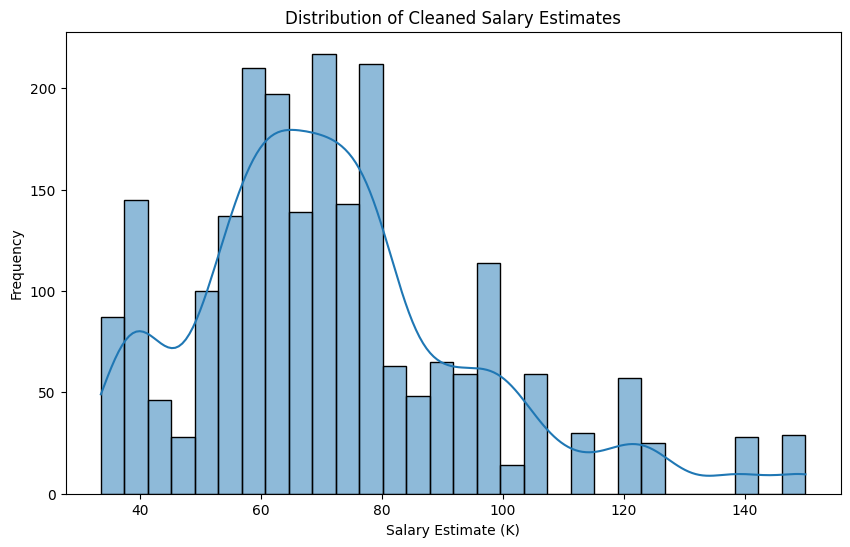

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean['Salary Estimate Clean'], bins=30, kde=True)
plt.title('Distribution of Cleaned Salary Estimates')
plt.xlabel('Salary Estimate (K)')
plt.ylabel('Frequency')
plt.show()

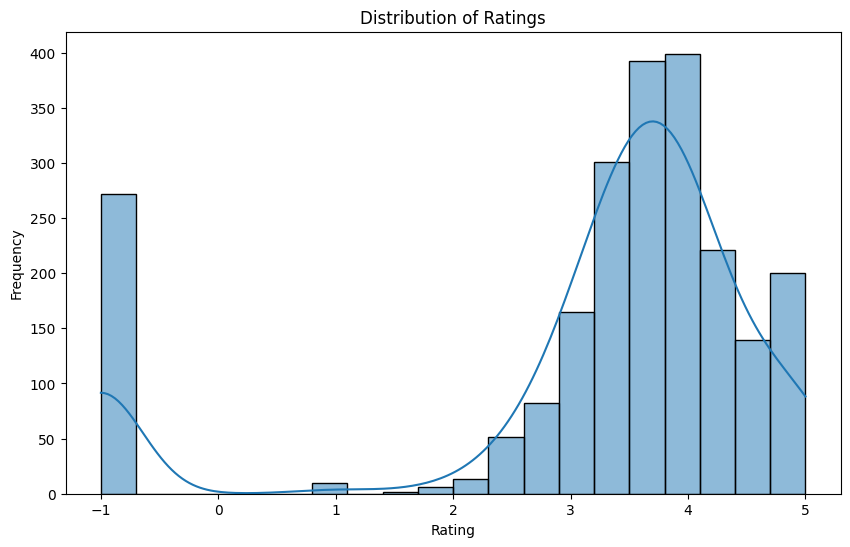

In [ ]:
# Visualize the distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

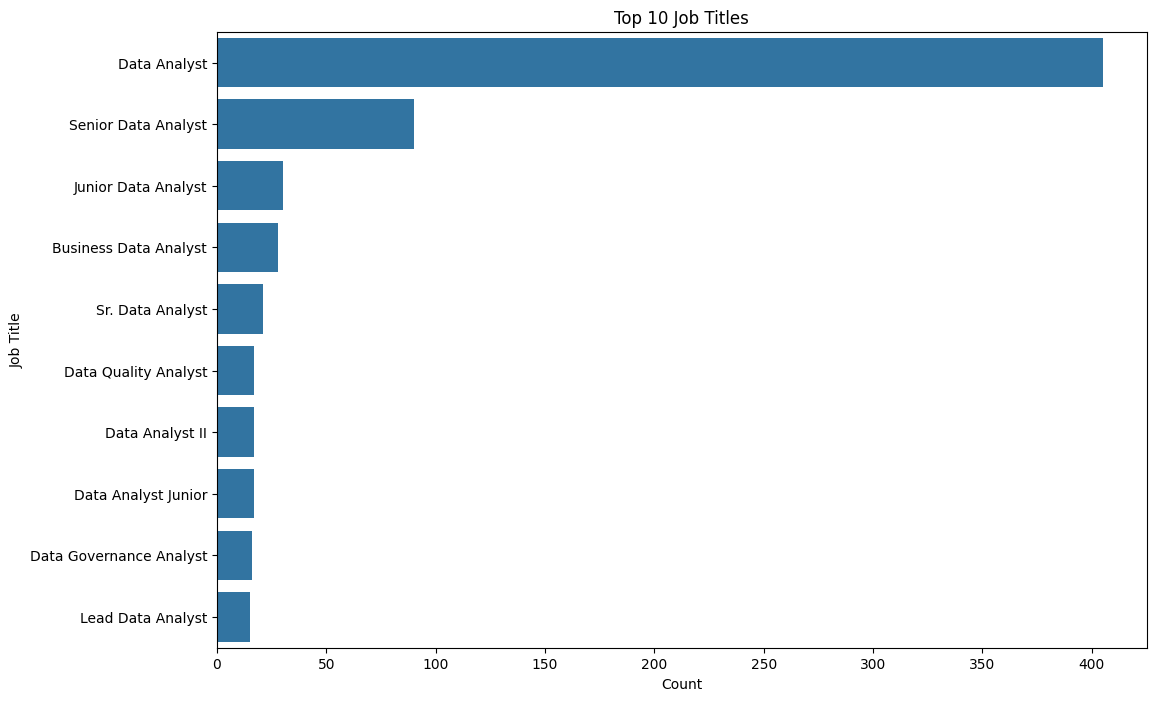

In [ ]:
# Top 10 Job Titles
plt.figure(figsize=(12,8))
sns.countplot(y='Job Title', data=df, order=df['Job Title'].value_counts().index[:10])
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

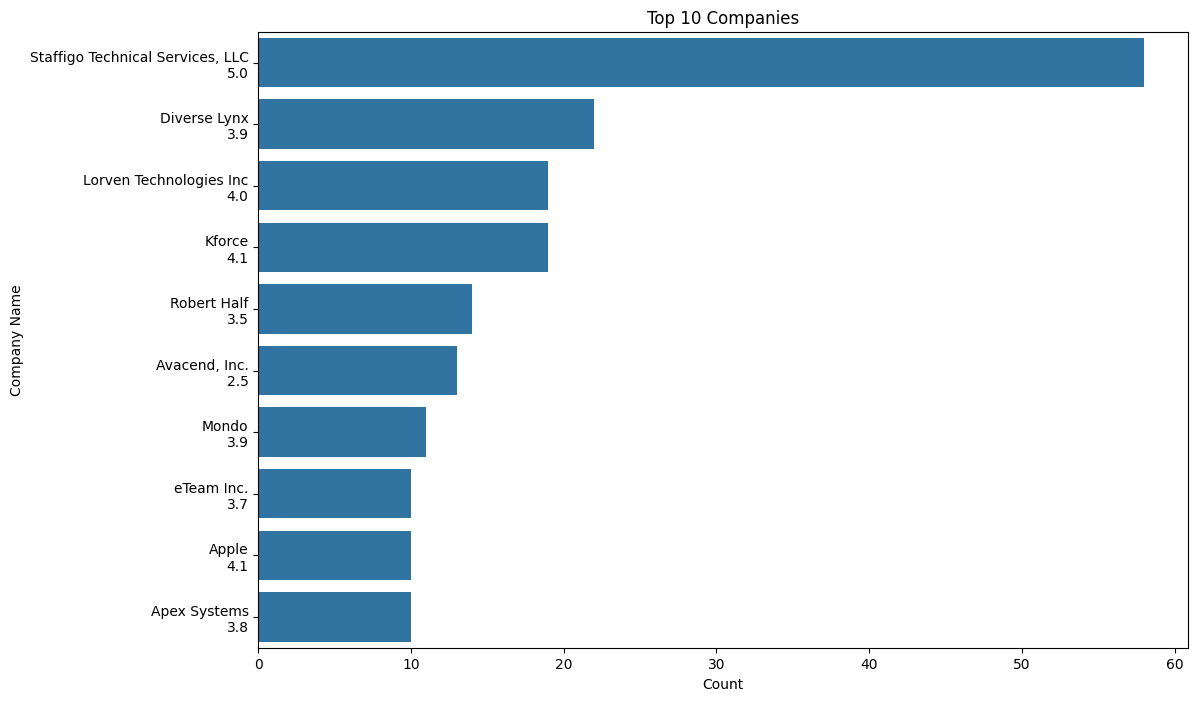

In [ ]:
# Top 10 Companies
plt.figure(figsize=(12,8))
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().index[:10])
plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()

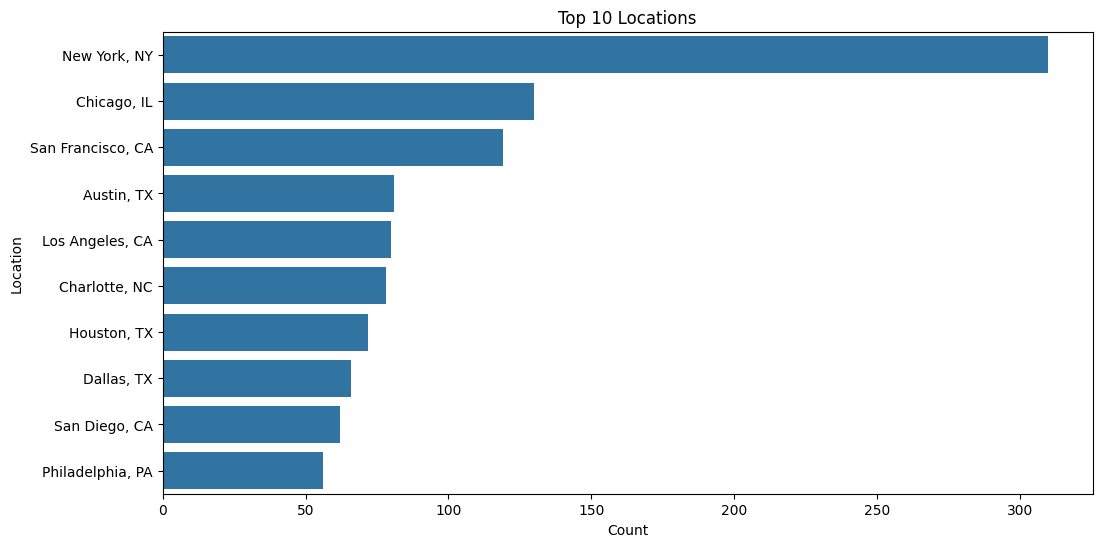

In [ ]:
# Top 10 Locations
plt.figure(figsize=(12,6))
sns.countplot(y='Location', data=df,
order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

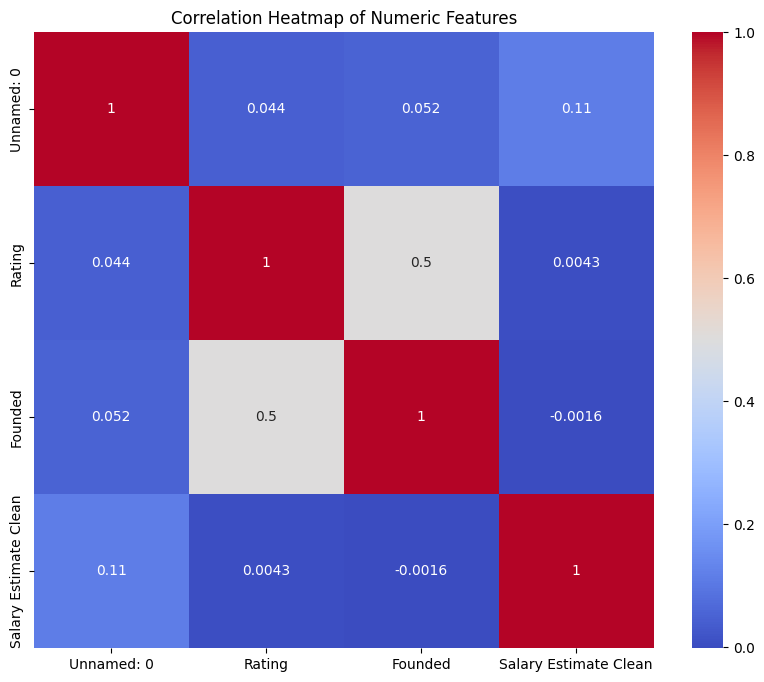

In [ ]:
# Generate the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
from collections import Counter
import nltk


In [ ]:
from nltk.corpus import stopwords
import string


In [ ]:
# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Combine all job descriptions into one large text
all_descriptions = ' '.join(df['Job Description'].dropna())

In [ ]:
# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
clean_text = all_descriptions.translate(translator)


In [ ]:
# Convert to lowercase and split into words
words = clean_text.lower().split()

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

In [ ]:
# Count the most common words
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)

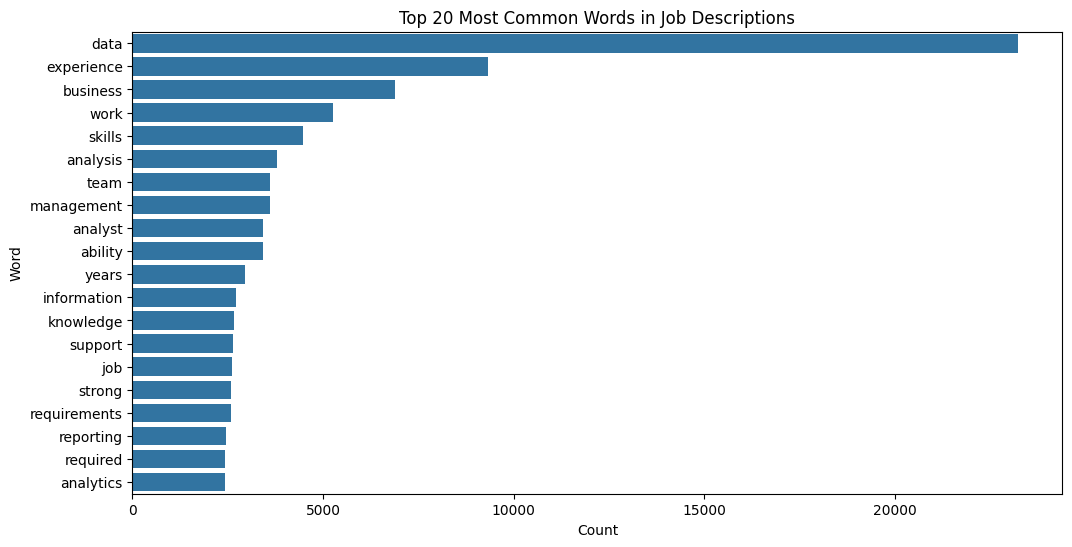

In [ ]:
# Plot the most common words
import matplotlib.pyplot as plt
words, counts = zip(*most_common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=counts, y=words)
plt.title('Top 20 Most Common Words in Job Descriptions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
# Show the most common words
print(most_common_words)


[('data', 23234), ('experience', 9328), ('business', 6895), ('work', 5273), ('skills', 4466), ('analysis', 3802), ('team', 3607), ('management', 3601), ('analyst', 3423), ('ability', 3415), ('years', 2947), ('information', 2712), ('knowledge', 2676), ('support', 2645), ('job', 2613), ('strong', 2596), ('requirements', 2589), ('reporting', 2463), ('required', 2426), ('analytics', 2417)]


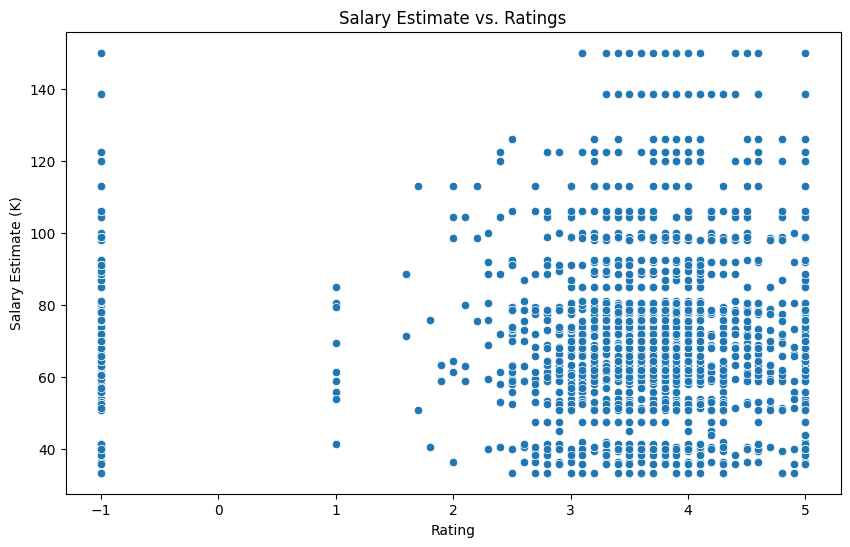

In [ ]:
# Plotting Salary Estimate vs. Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Salary Estimate Clean', data=df_clean)
plt.title('Salary Estimate vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Salary Estimate (K)')
plt.show()

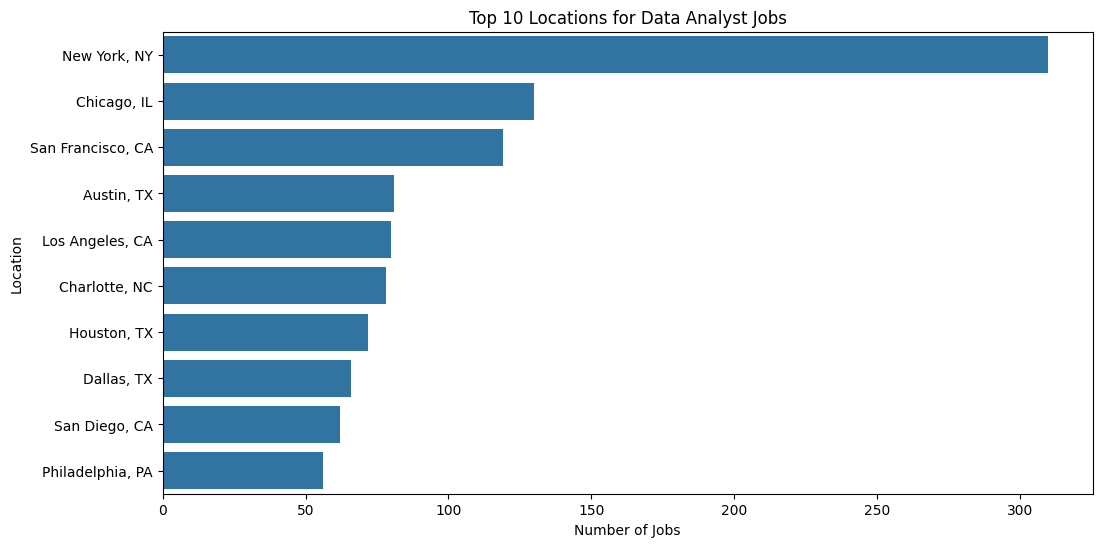

In [ ]:
# Top 10 locations for data analyst jobs
plt.figure(figsize=(12,6))
sns.countplot(y='Location', data=df,
order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Locations for Data Analyst Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()